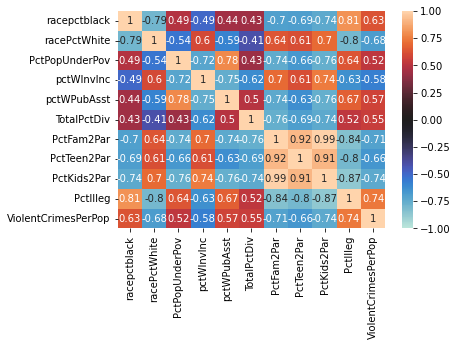

In [1]:
# ECS 171 GROUP PROJECT
# DATASET: Communities and Crime (UC Irvine Machine Learning Repository)


# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import tools
import csv
from sklearn.model_selection import train_test_split

# Import model
from sklearn.linear_model import LinearRegression

# Import analytics tool
from sklearn.metrics import mean_squared_error

# Read in the dataset from a .csv file
file = open('communities_new.csv', 'r', newline = '')
df = pd.read_csv(file, delimiter = ',')

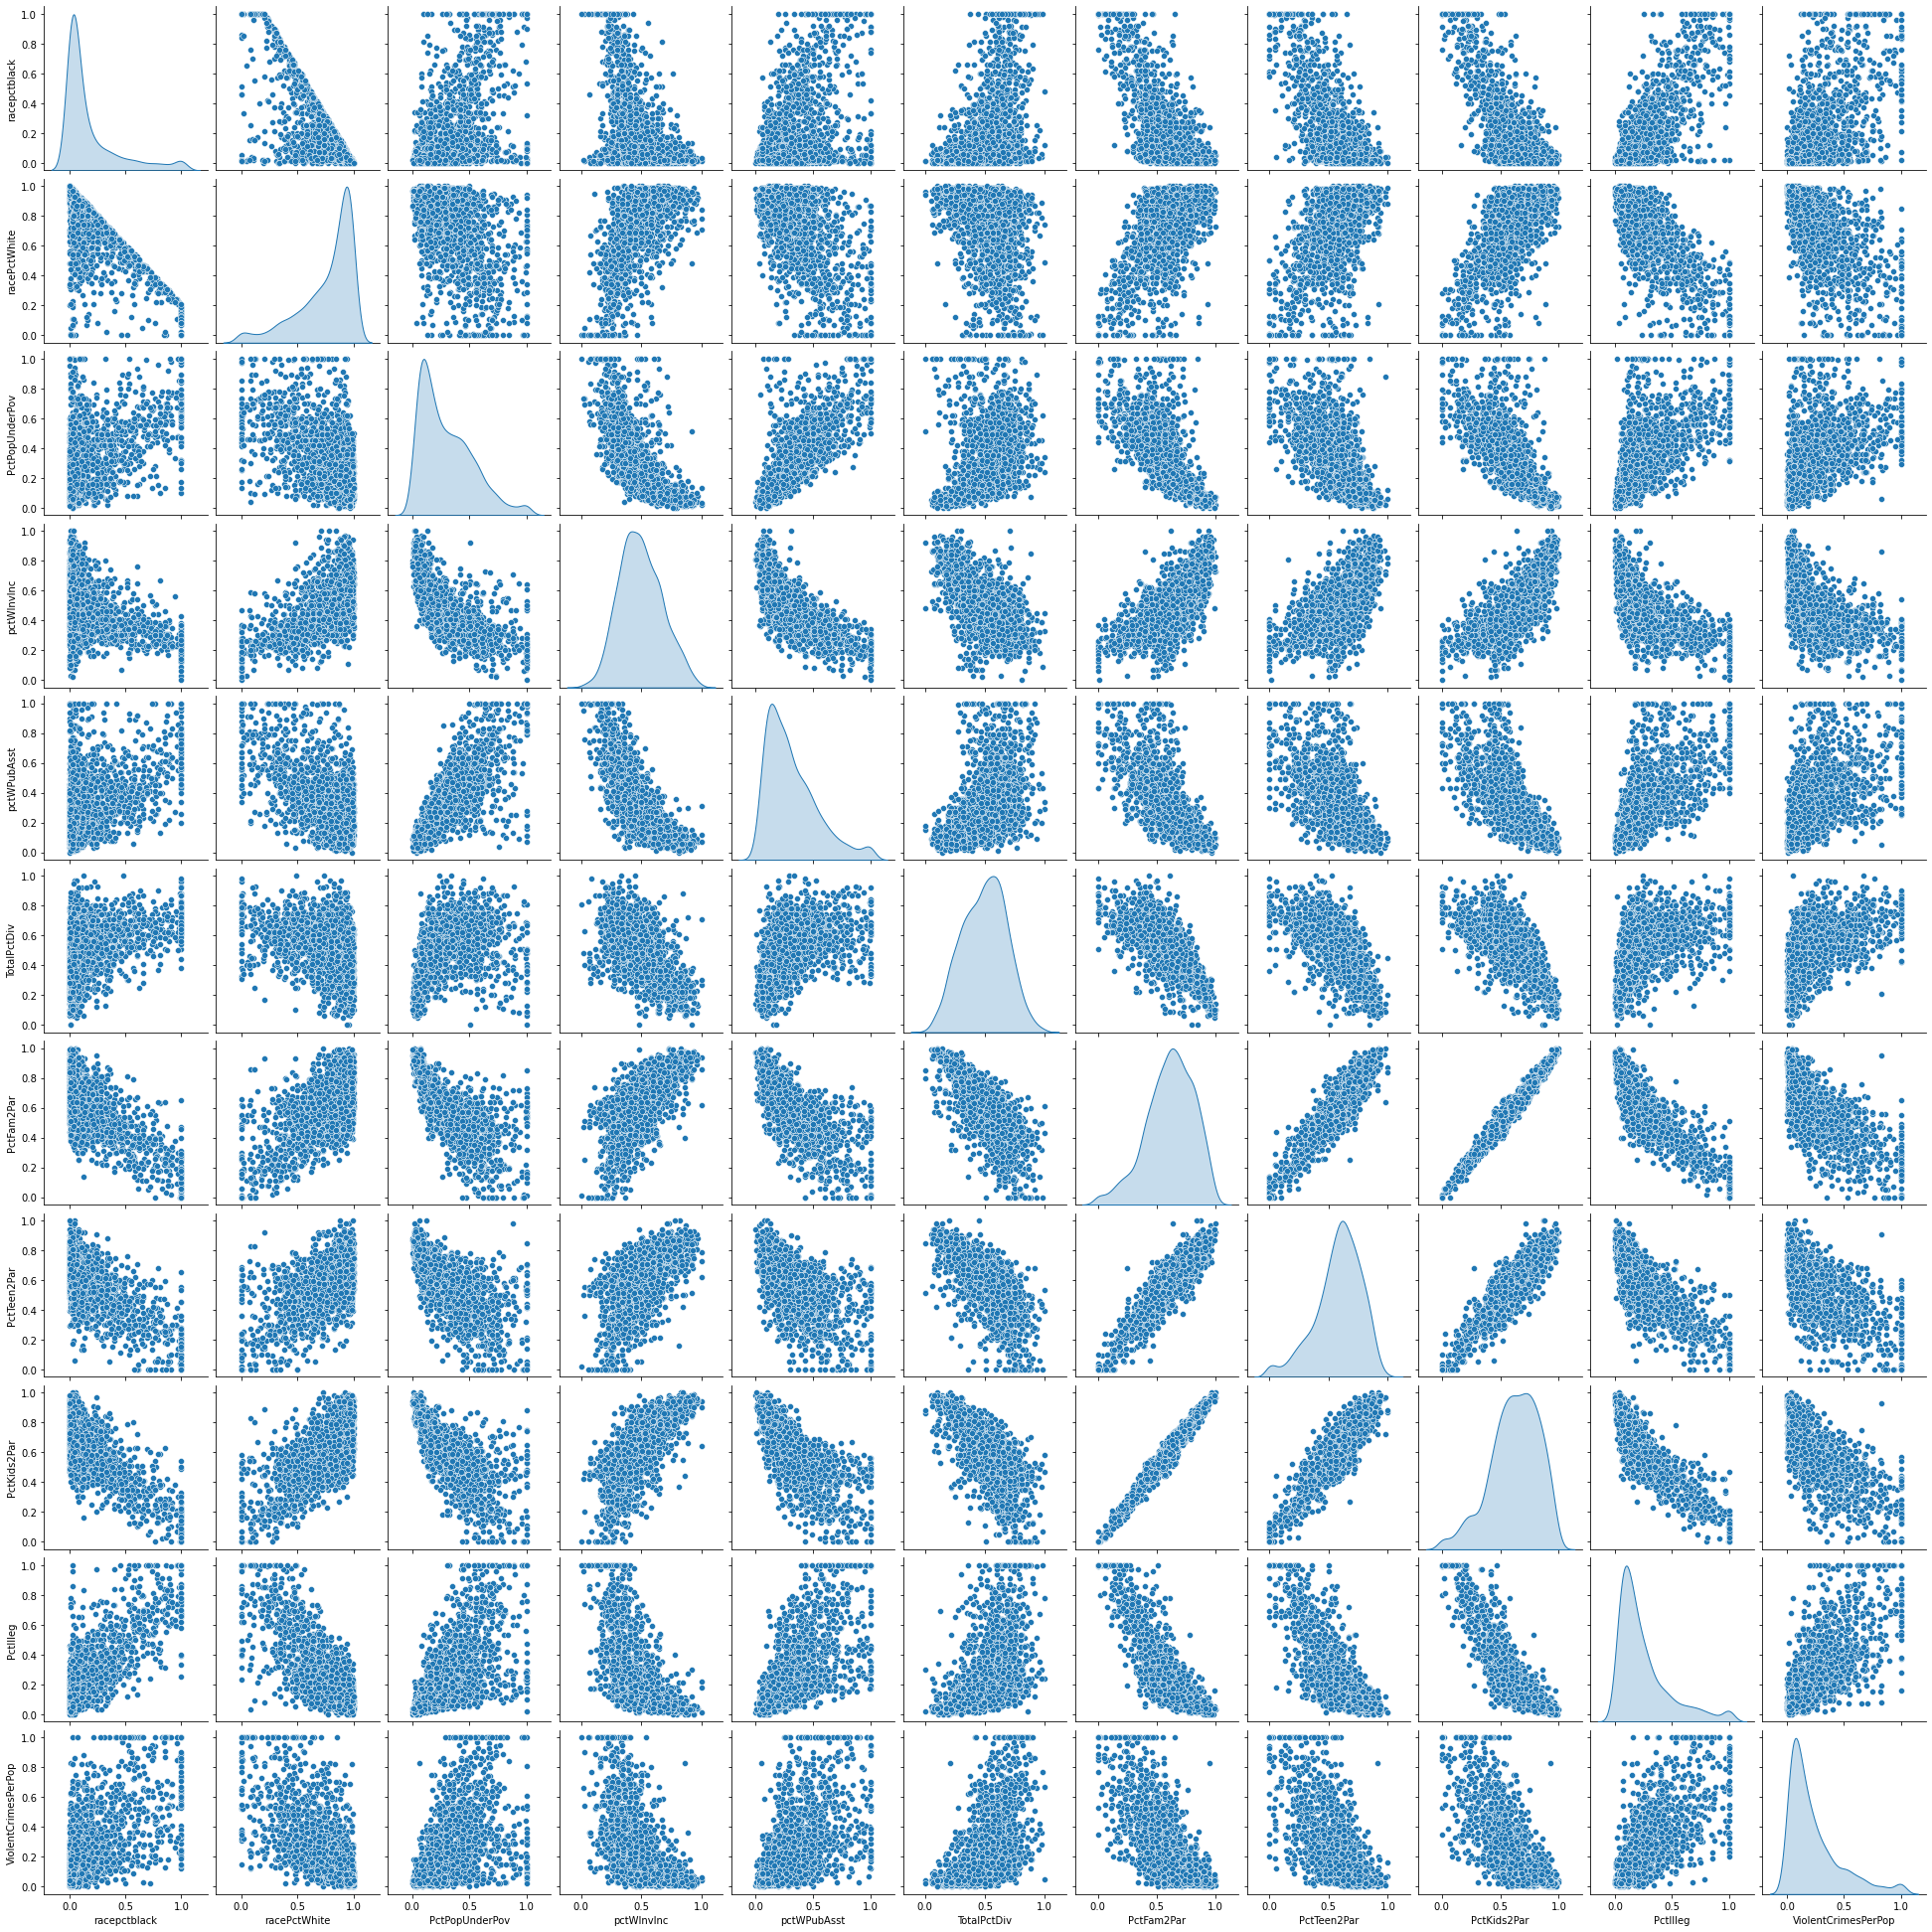

In [2]:
# DATA EXPLORATION

# Create heatmap with input attributes and output attribute
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

# Create pairplot to graphically identify relationships between input and output attributes
sns.pairplot(df, diag_kind='kde')
plt.show()

In [4]:
# MODEL 1: FAMILIAL ATTRIBUTES VS. VIOLENT CRIMES PER 100K
# INPUT ATTRIBUTES: PctKids2Par, PctIlleg, TotalPctDiv

# Split the dataset into training and testing sets with a 80:20 ratio
inputColumns = df[['PctKids2Par','PctIlleg','TotalPctDiv']]
outputColumn = df['ViolentCrimesPerPop']
x_train, x_test,y_train, y_test = train_test_split(inputColumns, outputColumn,test_size = 0.2, random_state=21)

# Train the linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)

# Make predictions using the testing set
reg_predictions = reg.predict(x_test)

# Get the mean squared error
print('\nMean squared error: ', mean_squared_error(y_test, reg_predictions))


Mean squared error:  0.019800573421352132


In [5]:
# MODEL 2: WEALTH ATTRIBUTES VS. VIOLENT CRIMES PER 100K
# INPUT ATTRIBUTES: PctPopUnderPov, pctWPubAsst, pctWInvInc

# Split the dataset into training and testing sets with a 80:20 ratio
inputColumns = df[['PctPopUnderPov','pctWPubAsst','pctWInvInc']]
outputColumn = df['ViolentCrimesPerPop']
x_train, x_test,y_train, y_test = train_test_split(inputColumns, outputColumn,test_size = 0.2, random_state=21)

# Train the linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)

# Make predictions using the testing set
reg_predictions = reg.predict(x_test)

# Get the mean squared error
print('\nMean squared error: ', mean_squared_error(y_test, reg_predictions))


Mean squared error:  0.030321798734355372


In [6]:
# MODEL 3: RACE ATTRIBUTES VS. VIOLENT CRIMES PER 100K
# INPUT ATTRIBUTES: racepctblack, racePctWhite

# Split the dataset into training and testing sets with a 80:20 ratio
inputColumns = df[['racepctblack','racePctWhite']]
outputColumn = df['ViolentCrimesPerPop']
x_train, x_test,y_train, y_test = train_test_split(inputColumns, outputColumn,test_size = 0.2, random_state=21)

# Train the linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)

# Make predictions using the testing set
reg_predictions = reg.predict(x_test)

# Get the mean squared error
print('\nMean squared error: ', mean_squared_error(y_test, reg_predictions))


Mean squared error:  0.02548976923588889


In [7]:
# MODEL 3: ALL ATTRIBUTES VS. VIOLENT CRIMES PER 100K
# INPUT ATTRIBUTES: PctKids2Par, PctIlleg, TotalPctDiv,
#                   PctPopUnderPov, pctWPubAsst, pctWInvInc, 
#                   racepctblack, racePctWhite

# Split the dataset into training and testing sets with a 80:20 ratio
inputColumns = df[['PctKids2Par','PctIlleg','TotalPctDiv','racepctblack','racePctWhite',
                   'PctPopUnderPov','pctWPubAsst','pctWInvInc']]
outputColumn = df['ViolentCrimesPerPop']
x_train, x_test,y_train, y_test = train_test_split(inputColumns, outputColumn,test_size = 0.2, random_state=21)

# Train the linear regression model
reg = LinearRegression()
reg.fit(x_train, y_train)

# Make predictions using the testing set
reg_predictions = reg.predict(x_test)

# Get the mean squared error
print('\nMean squared error: ', mean_squared_error(y_test, reg_predictions))


Mean squared error:  0.018916681213162385
